In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

C:\Users\91773\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\91773\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load dataset from local file
df = pd.read_csv("StarClassificationDataset.csv")
print("Dataset Loaded:\n", df.head())

Dataset Loaded:
       object_ID        alpha      delta  UV_filter  green_filter  red_filter  \
0  1.240000e+18  135.6891066  32.494632   23.87882      22.27530    20.39501   
1  1.240000e+18  144.8261006  31.274185   24.77759      22.83188    22.58444   
2  1.240000e+18  142.1887896  35.582444   25.26307      22.66389    20.60976   
3  1.240000e+18  338.7410378  -0.402828   22.13682      23.77656    21.61162   
4  1.240000e+18  345.2825932  21.183866   19.43718      17.58028    16.49747   

   near_IR_filter  IR_filter run_ID  rerun_ID  cam_col  field_ID  \
0        19.16573   18.79371   3606       301        2        79   
1        21.16812   21.61427   4518       301        5       119   
2        19.34857   18.94827   3606       301        2       120   
3        20.50454   19.25010   4192       301        3       214   
4        15.97711   15.54461    NaN       301        3       137   

    spec_obj_ID  red_shift  plate_ID    MJD  fiber_ID   class  
0  6.540000e+18   0.634794   

C:\Users\91773\AppData\Local\Temp\ipykernel_26440\797721734.py:2: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StarClassificationDataset.csv")


In [4]:
# Drop unnecessary columns
df = df.drop(columns=['object_ID'])

In [5]:
# Handle missing values and strip whitespace
df = df.replace(r'^\s*$', np.nan, regex=True).dropna()

In [6]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['alpha', 'run_ID', 'class']


In [7]:
# Convert non-numeric columns to numeric
for col in non_numeric_cols:
    if col != 'class':  # Skip the target column
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Drop any remaining NaN values after conversion
df = df.dropna()

In [9]:
# Convert categorical target to numeric encoding
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

In [10]:
# Define features and target
X = df.drop(columns=['class'])
y = df['class']

In [11]:
# Stratified splitting
df['class'].value_counts(normalize=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Training set class distribution:\n", y_train.value_counts(normalize=True))
print("Validation set class distribution:\n", y_val.value_counts(normalize=True))

Training set class distribution:
 class
0    0.594417
2    0.215962
1    0.189621
Name: proportion, dtype: float64
Validation set class distribution:
 class
0    0.594409
2    0.215972
1    0.189619
Name: proportion, dtype: float64


In [12]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [13]:
# Train classification model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


In [14]:
# Evaluate model
y_pred = model.predict(X_val)
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11887
           1       0.96      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     19998
   macro avg       0.98      0.97      0.98     19998
weighted avg       0.98      0.98      0.98     19998



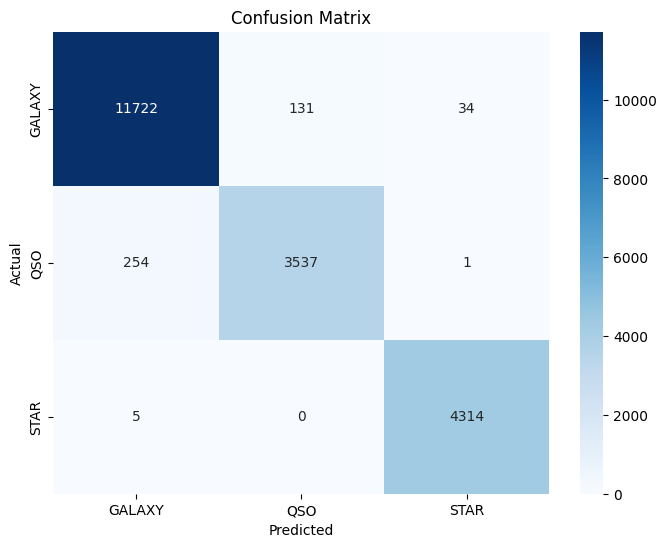

In [15]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Save model and scaler
joblib.dump(scaler, "scaler.pkl")
joblib.dump(model, "stellar_model.pkl")
print("Model and scaler saved successfully")

Model and scaler saved successfully
